In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Electric Vehicle Sales by State in India.csv")

In [7]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [8]:
print(df.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


In [9]:
df.shape

(96845, 8)

In [10]:
df.columns.nunique()

8

In [11]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [12]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [13]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [14]:
df.Year.value_counts()

Year
2019.0    10315
2023.0    10279
2018.0    10225
2022.0    10021
2017.0     9799
2016.0     9348
2021.0     9249
2015.0     9052
2014.0     9022
2020.0     8675
2024.0      860
Name: count, dtype: int64

In [15]:
df.State.value_counts()

State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chan

In [16]:
df.Vehicle_Class.value_counts()

Vehicle_Class
MOTOR CAR                           4111
M-CYCLE/SCOOTER                     4101
GOODS CARRIER                       4096
MOTOR CAB                           3985
BUS                                 3813
                                    ... 
SEMI-TRAILER (COMMERCIAL)             18
X-RAY VAN                             12
MOTOR CYCLE/SCOOTER-WITH TRAILER       9
MODULAR HYDRAULIC TRAILER              3
MOTOR CARAVAN                          3
Name: count, Length: 73, dtype: int64

In [17]:
df.Vehicle_Category.value_counts()

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

In [18]:
df.Vehicle_Type.value_counts()

Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64

In [19]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [22]:
print("Shape of dataset:", df.shape)

Shape of dataset: (96845, 8)


In [23]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')


In [24]:
#Dataset info (datatypes,null values)
print("\nDataset Info: \n")
print(df.info())


Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB
None


In [25]:
#Forward fill or mode fill for  categorical columns
for col in['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']:
     if df[col].isnull().sum()> 0:
         df[col] = df[col].fillna(df[col].mode()[0])
         

In [26]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [27]:
#Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [28]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [29]:
df= df.dropna(subset=['Date'])

In [30]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [31]:
#Exract useful features from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek #Monday=0,sunday=6
df['Quarter'] = df['Date'].dt.quarter



In [32]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day,DayOfWeek,Quarter
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1,1,2,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1,1,2,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1,1,2,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1,1,2,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96840,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0,12,1,4,4
96841,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0,12,1,4,4
96842,2023,dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0,12,1,4,4
96843,2023,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0,12,1,4,4


In [33]:
#Weekend indicator
df['Is_weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [34]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day,DayOfWeek,Quarter,Is_weekend
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1,1,2,1,0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1,1,2,1,0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1,1,2,1,0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1,1,2,1,0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96840,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0,12,1,4,4,0
96841,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0,12,1,4,4,0
96842,2023,dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0,12,1,4,4,0
96843,2023,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0,12,1,4,4,0


In [35]:
print("\nAfter preprocessing:")
print(df.head())
print("\nMissing values after cleaning:\n",df.isull().sum())


After preprocessing:
   Year Month_Name       Date           State         Vehicle_Class  \
0  2014        jan 2014-01-01  Andhra Pradesh       ADAPTED VEHICLE   
1  2014        jan 2014-01-01  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014        jan 2014-01-01  Andhra Pradesh             AMBULANCE   
3  2014        jan 2014-01-01  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014        jan 2014-01-01  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  Month  Day  DayOfWeek  \
0           Others       Others                0.0      1    1          2   
1           Others       Others                0.0      1    1          2   
2           Others       Others                0.0      1    1          2   
3           Others       Others                0.0      1    1          2   
4              Bus          Bus                0.0      1    1          2   

   Quarter  Is_weekend  
0        1           0  
1        1           0  
2        1   

AttributeError: 'DataFrame' object has no attribute 'isull'

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

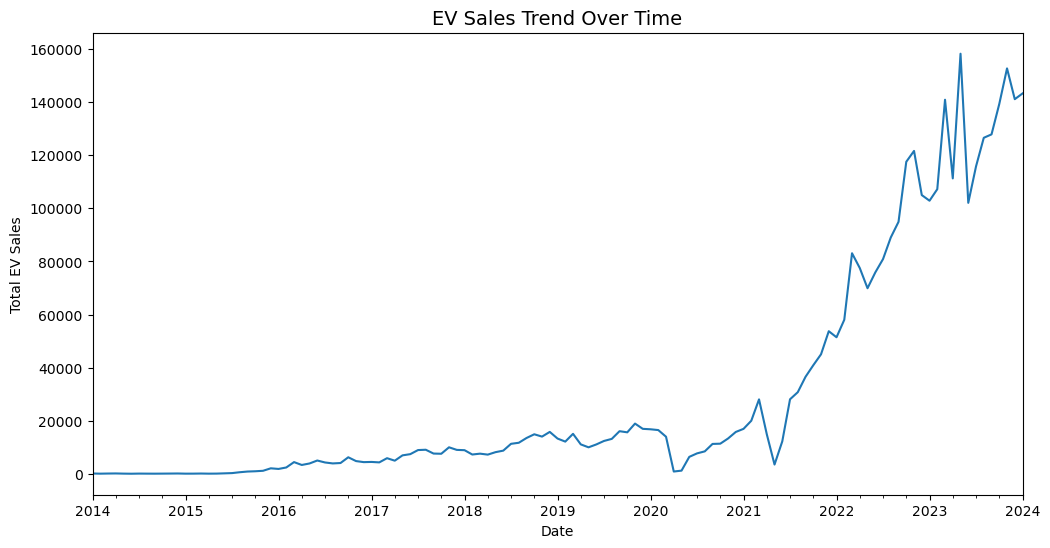

In [37]:
## 1. EV Sales trend Over Time
# ----------------------------
plt.figure(figsize=(12,6))
df.groupby('Date')['EV_Sales_Quantity'].sum().plot()
plt.title("EV Sales Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total EV Sales")
plt.show()

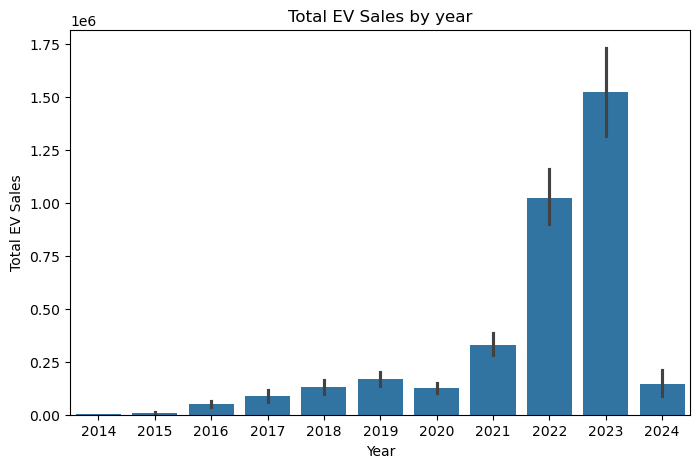

In [38]:
#  2. EV SAles by Year
plt.figure(figsize=(8,5))
sns.barplot(x="Year", y="EV_Sales_Quantity", data=df, estimator=sum)
plt.title("Total EV Sales by year")
plt.ylabel("Total EV Sales")
plt.show()





   


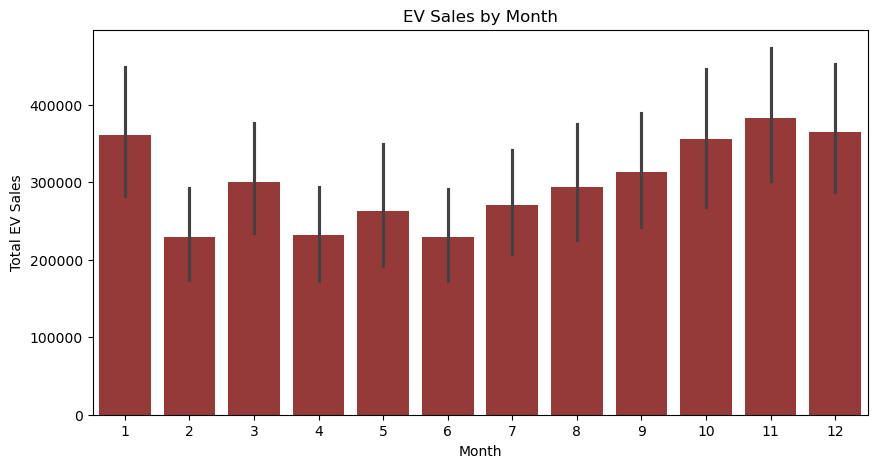

In [39]:
#3EV Sales by month
#--------------------------------
plt.figure(figsize=(10,5))
sns.barplot(x="Month", y="EV_Sales_Quantity", data=df, estimator=sum, color='brown')
plt.title("EV Sales by Month")
plt.ylabel("Total EV Sales")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Rajasthan'),
  Text(5, 0, 'Bihar'),
  Text(6, 0, 'Tamil Nadu'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Assam'),
  Text(9, 0, 'Kerala')])

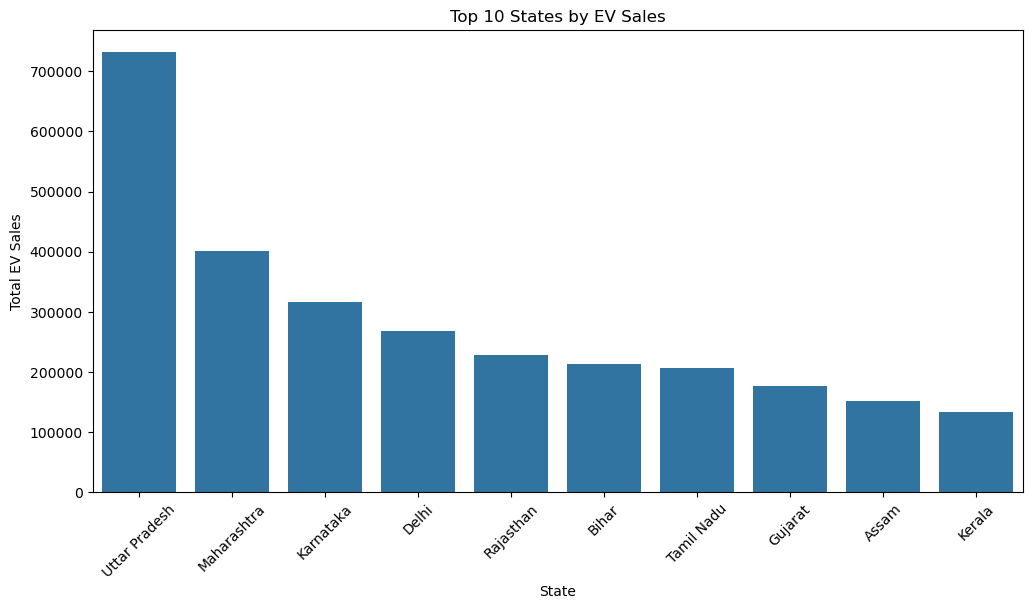

In [41]:
#4.EV Sales by State (Top 10)
#-----------------------------------------
top_states=df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States by EV Sales")
plt.ylabel("Total EV Sales")
plt.xticks(rotation=45)

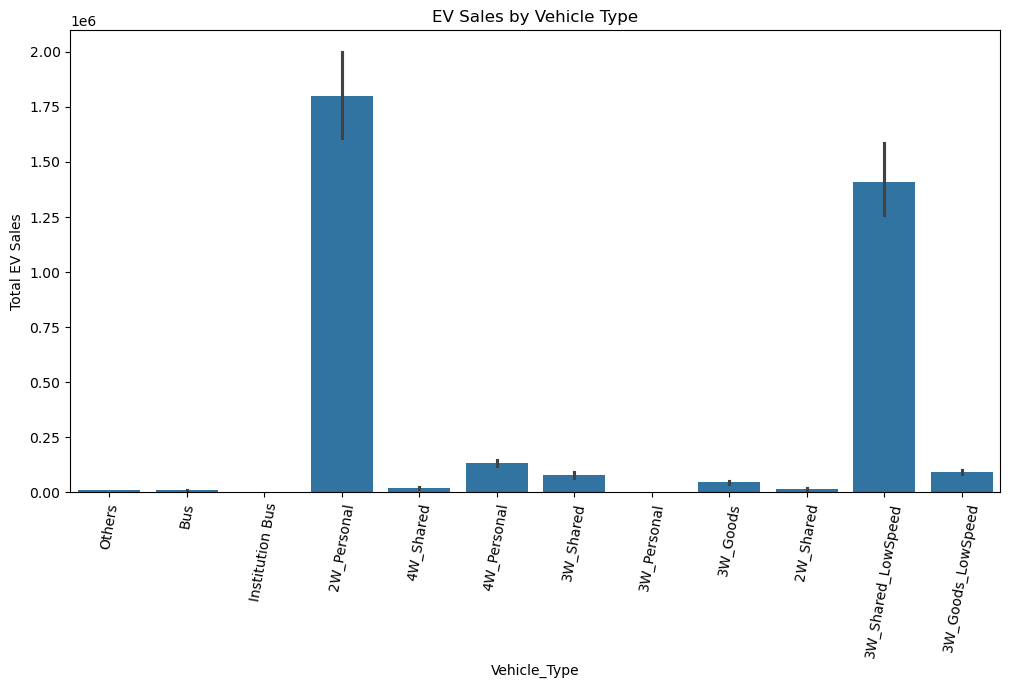

In [42]:
#5. EV sales by Vehicle Type
#----------------------------
plt.figure(figsize=(12,6))
sns.barplot(x="Vehicle_Type", y="EV_Sales_Quantity", data=df, estimator=sum)
plt.title("EV Sales by Vehicle Type")

plt.ylabel("Total EV Sales")
#Rotate x_axis labels
plt.xticks(rotation=80)
plt.show()


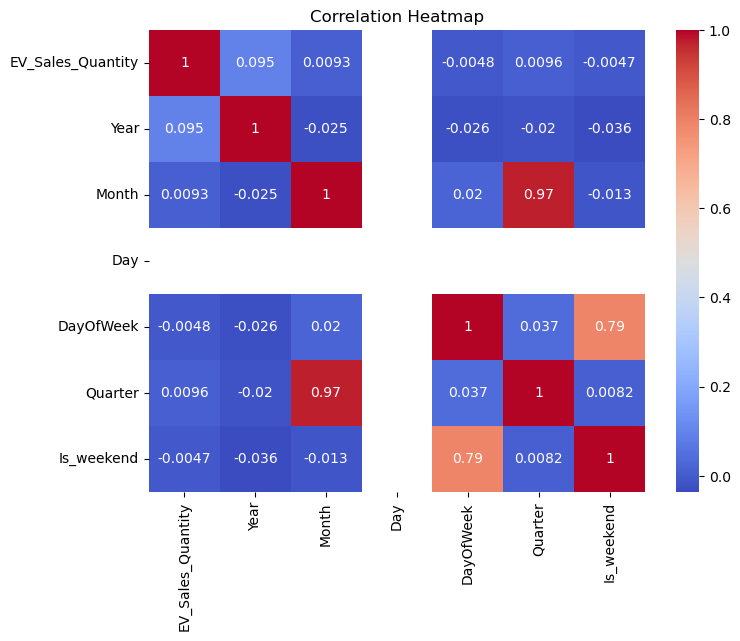

In [44]:
#6. Correlation Heatmap
#-----------------------------

plt.figure(figsize=(8,6))
sns.heatmap(df[['EV_Sales_Quantity','Year','Month','Day','DayOfWeek','Quarter','Is_weekend']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [45]:
#Step 4: Feature Engineering
#-------------------------------
from sklearn.preprocessing import LabelEncoder

#1. Convert 'Date' column to datetime format (if not already done)
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


In [46]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day,DayOfWeek,Quarter,Is_weekend
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1,1,2,1,0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1,1,2,1,0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1,1,2,1,0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1,1,2,1,0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96840,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0,12,1,4,4,0
96841,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0,12,1,4,4,0
96842,2023,dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0,12,1,4,4,0
96843,2023,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0,12,1,4,4,0


In [47]:
#2. Create new features from 'Date'
df['Day'] = df['Date'].dt.day
df['Quarter'] = df['Date'].dt.quarter
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)

In [48]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day,DayOfWeek,Quarter,Is_weekend,WeekOfYear
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1,1,2,1,0,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1,1,2,1,0,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1,1,2,1,0,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1,1,2,1,0,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96840,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0,12,1,4,4,0,48
96841,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0,12,1,4,4,0,48
96842,2023,dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0,12,1,4,4,0,48
96843,2023,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0,12,1,4,4,0,48


In [49]:
#3. Encode categorial variables
cat_cols = ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'Month_Name']


#Initialize LabelEncoder
le = LabelEncoder()
for col in cat_cols: 
    df[col] = le.fit_transform(df[col].astype(str))

print("Feature engineering completed. New columns  added: Day, Quarter, WeekOfYear")
print(df.head())
      

Feature engineering completed. New columns  added: Day, Quarter, WeekOfYear
   Year  Month_Name       Date  State  Vehicle_Class  Vehicle_Category  \
0  2014           4 2014-01-01      1              0                 4   
1  2014           4 2014-01-01      1              1                 4   
2  2014           4 2014-01-01      1              2                 4   
3  2014           4 2014-01-01      1              5                 4   
4  2014           4 2014-01-01      1              9                 3   

   Vehicle_Type  EV_Sales_Quantity  Month  Day  DayOfWeek  Quarter  \
0            11                0.0      1    1          2        1   
1            11                0.0      1    1          2        1   
2            11                0.0      1    1          2        1   
3            11                0.0      1    1          2        1   
4             9                0.0      1    1          2        1   

   Is_weekend  WeekOfYear  
0           0           1  
1 

In [50]:
target = 'EV_Sales_Quantity'

#Drop columns that are redundant or for reference
X = df.drop([target,'Date', 'Month_Name'], axis=1)
y = df[target]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
categorical_features = ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
numerical_features =  [col for col in X.columns if col not in categorical_features]


In [54]:
categorical_features

['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']

In [55]:
numerical_features

['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'Is_weekend', 'WeekOfYear']

In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)   

In [57]:
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Month', 'Day',
                                                   'DayOfWeek', 'Quarter',
                                                   'Is_weekend',
                                                   'WeekOfYear']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State', 'Vehicle_Class',
                                                   'Vehicle_Category',
                                                   'Vehicle_Type'])])),
                ('regressor', LinearRegression())])

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)

RMSE: 484.1108131515632
R^2 Score: 0.10001046149050008


In [59]:
coefs = model.named_steps['regressor'].coef_
feature_names = np.array(numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

              Feature  Coefficient
72   Vehicle_Class_31   296.202279
59   Vehicle_Class_18   282.363062
125    Vehicle_Type_6   282.363062
38           State_31   136.167554
15            State_8    80.503986
..                ...          ...
123    Vehicle_Type_4   -67.725932
101  Vehicle_Class_60   -67.725932
79   Vehicle_Class_38   -68.277462
86   Vehicle_Class_45   -88.590240
73   Vehicle_Class_32  -106.263031

[131 rows x 2 columns]


In [60]:
#Evaluation

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Root Mean Squared Error (RMSE): 484.1108131515632
Mean Absolute Error (MAE): 89.02767399019713
R^2 Score: 0.10001046149050008


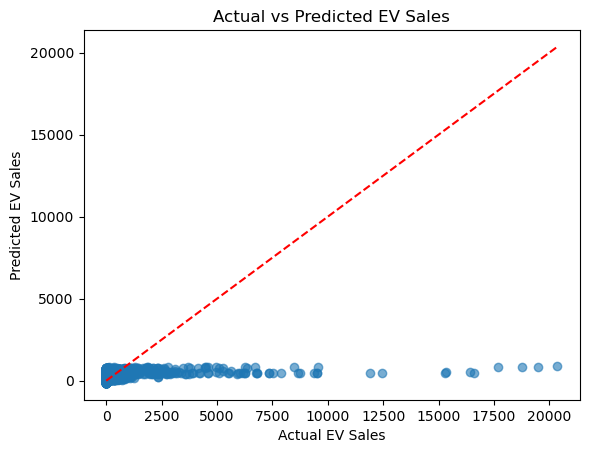

In [62]:
## visualization

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("Actual vs Predicted EV Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line
plt.show()

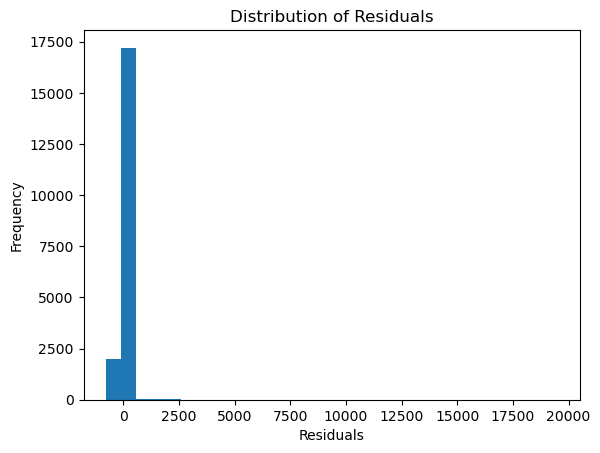

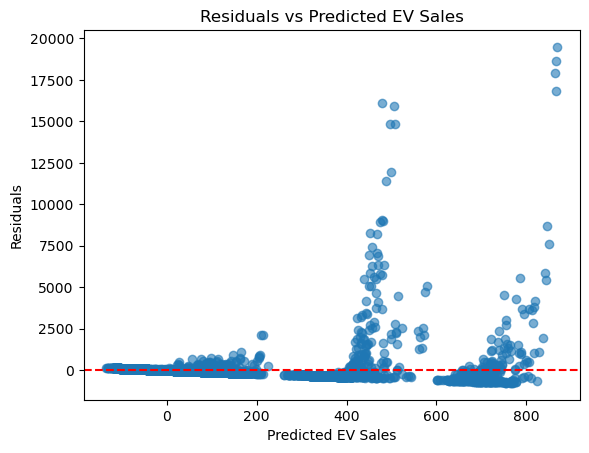

In [63]:
residuals = y_test - y_pred

plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.scatter(y_pred, residuals, alpha=0.6)
plt.xlabel("Predicted EV Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted EV Sales")
plt.axhline(0, color='r', linestyle='--')
plt.show()

In [64]:
coefs = model.named_steps['regressor'].coef_
feature_names = np.array(numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

              Feature  Coefficient
72   Vehicle_Class_31   296.202279
59   Vehicle_Class_18   282.363062
125    Vehicle_Type_6   282.363062
38           State_31   136.167554
15            State_8    80.503986
..                ...          ...
123    Vehicle_Type_4   -67.725932
101  Vehicle_Class_60   -67.725932
79   Vehicle_Class_38   -68.277462
86   Vehicle_Class_45   -88.590240
73   Vehicle_Class_32  -106.263031

[131 rows x 2 columns]


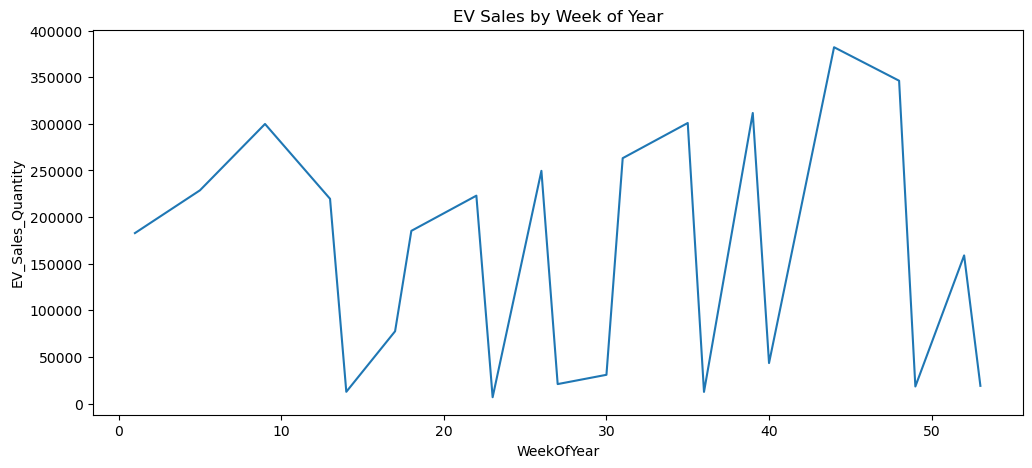

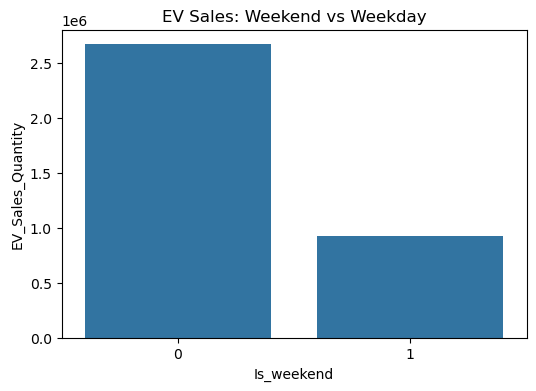

In [65]:
# By WeekOfYear
weekly_sales = df.groupby('WeekOfYear')['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='WeekOfYear', y='EV_Sales_Quantity', data=weekly_sales)
plt.title('EV Sales by Week of Year')
plt.show()

# Weekend vs Weekday
weekend_sales = df.groupby('Is_weekend')['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Is_weekend', y='EV_Sales_Quantity', data=weekend_sales)
plt.title('EV Sales: Weekend vs Weekday')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14884\3620580552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=sales_type, palette='coolwarm')


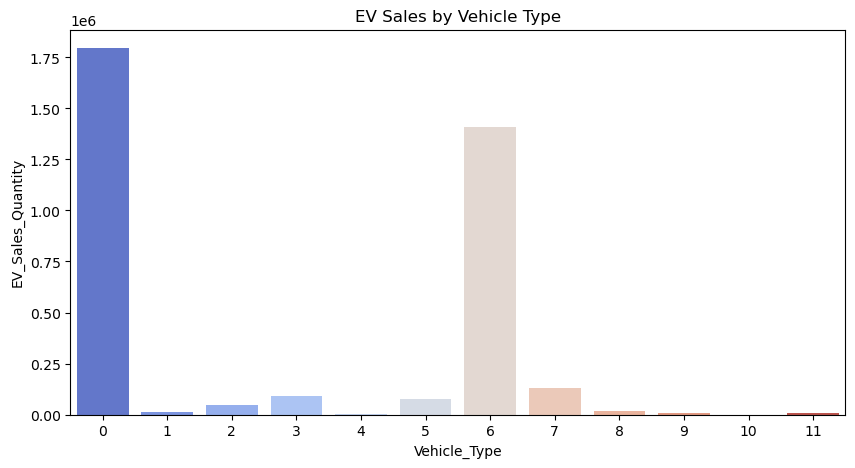

In [66]:
sales_type = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=sales_type, palette='coolwarm')
plt.title('EV Sales by Vehicle Type')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14884\378075956.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=sales_class, palette='Set2')


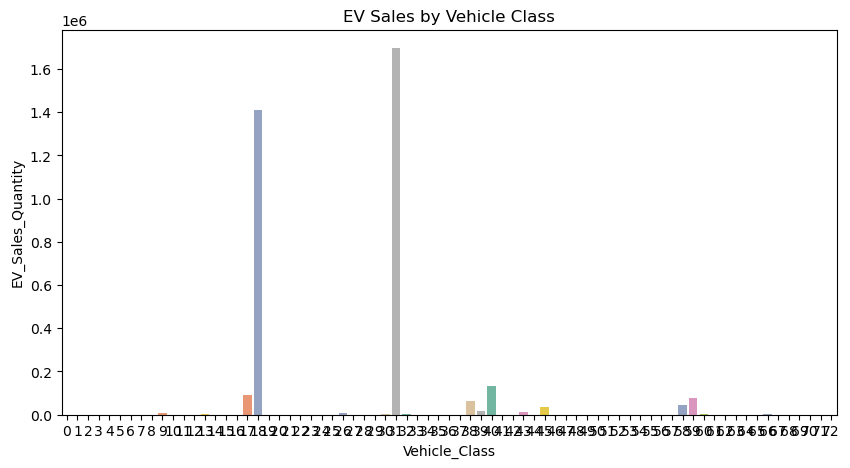

In [67]:
sales_class = df.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=sales_class, palette='Set2')
plt.title('EV Sales by Vehicle Class')
plt.show()

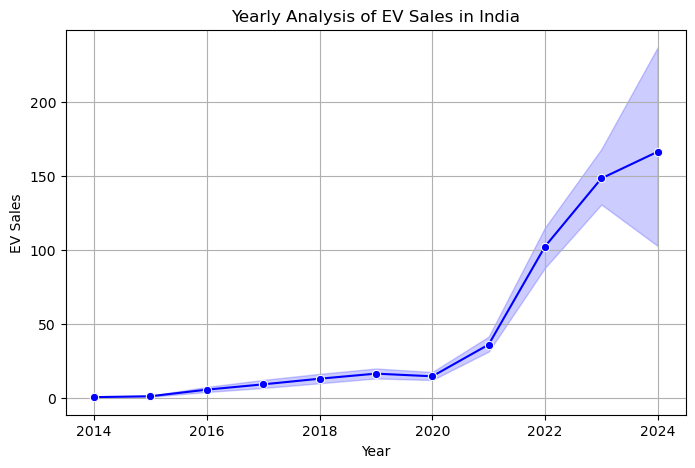

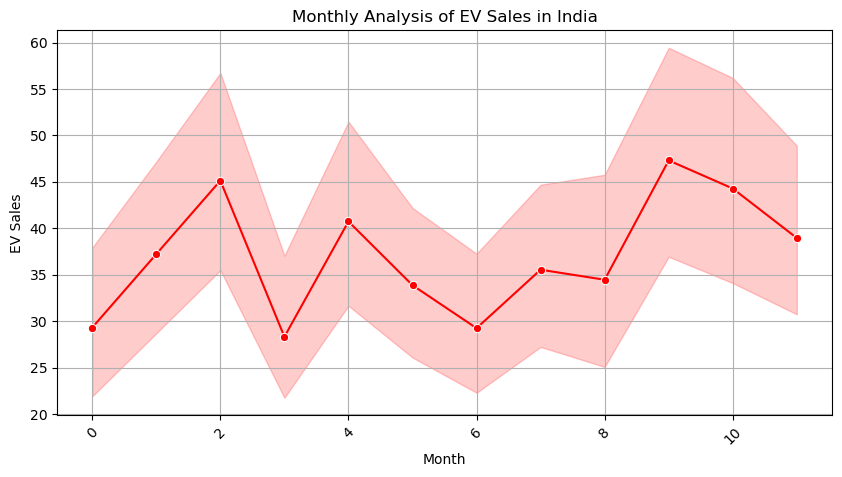

In [68]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o', color='b')
plt.title('Yearly Analysis of EV Sales in India')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o', color='r')
plt.title('Monthly Analysis of EV Sales in India')
plt.xlabel('Month')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9020\890485453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=df, palette='bright')


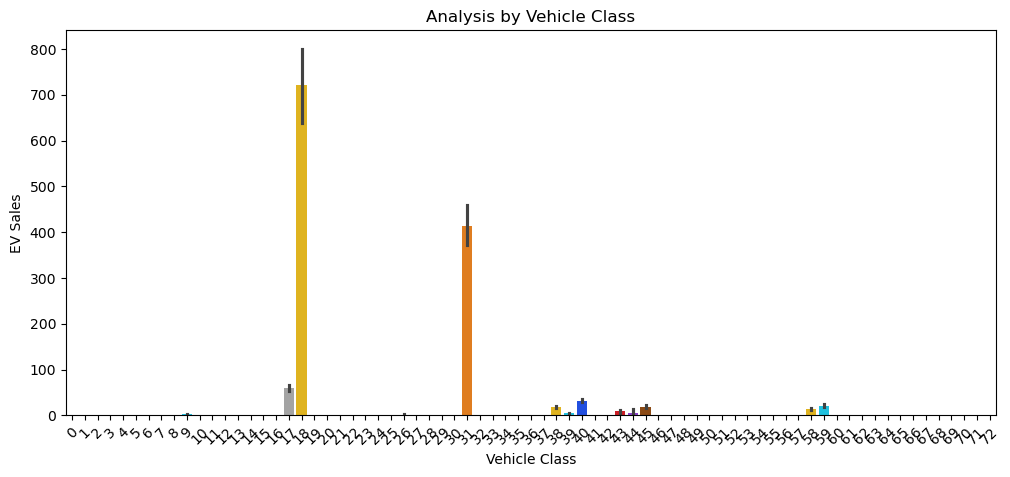

C:\Users\HP\AppData\Local\Temp\ipykernel_9020\890485453.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, palette='bright')


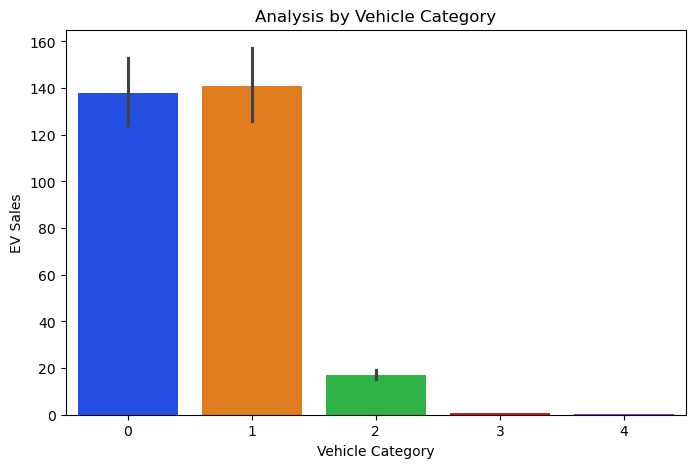

C:\Users\HP\AppData\Local\Temp\ipykernel_9020\890485453.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, palette='bright')


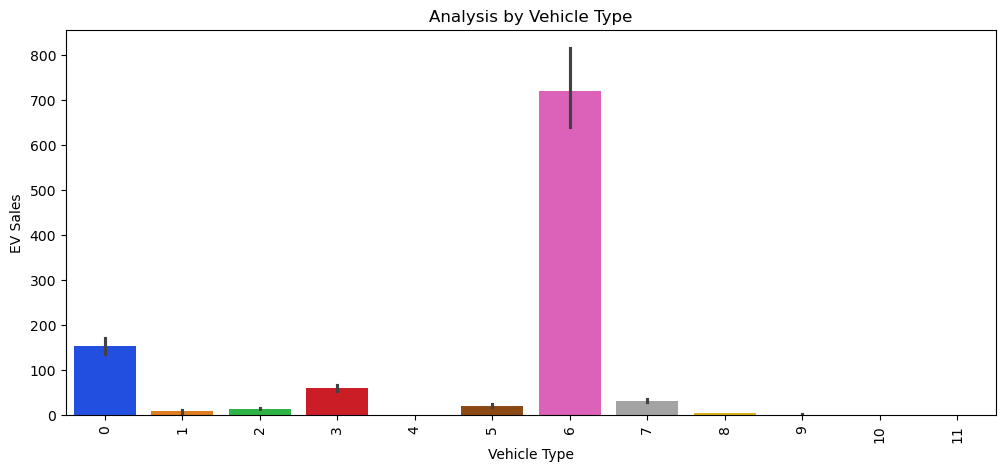

In [89]:
plt.figure(figsize=(12,5))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=df, palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='State'>

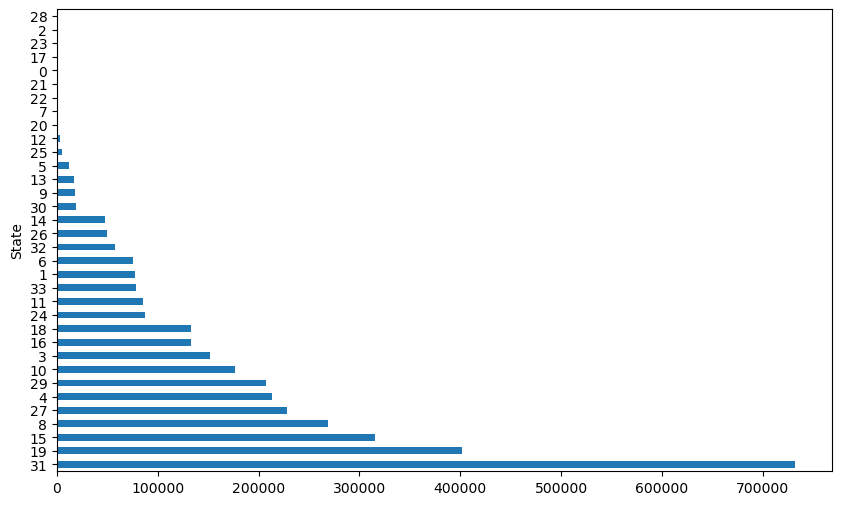

In [69]:
df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(10,6))

MADE BY - SIMPY

Github :- https://github.com/Simpy1-hub/Simpy1-hub.git

linkedin :- www.linkedin.com/in/simpy-149a0a242